# Importing Necessary Python Modules

In [44]:
%%capture
import pandas as pd
import numpy as np
import os
import yaml
import matplotlib.pyplot as plt
import seaborn as sns
!pip install chatterbot
!pip install chatterbot_corpus
from chatterbot import ChatBot
from chatterbot.trainers import ChatterBotCorpusTrainer
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = [12, 6]
import warnings
warnings.filterwarnings("ignore")
%config InlineBackend.figure_format = 'retina'
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# Importing Dataset

In [45]:
# Importing directory of dataset folder
filenames = (os.listdir("/content/data/"))

# assigining column names
data = pd.DataFrame(columns={"question","answer","category"})

# iterating over filesnames to extact data from the corresponding files and
# putting them into the corresponding columns respectively
for file in filenames:
    data_curr = pd.DataFrame(columns={"question","answer","category"})
    
    file = open("data/"+file)
    file = yaml.load(file)
    category = file["categories"]
    conversation = file["conversations"]
    
    question = []
    answer = []

    for i in range(len(conversation)):
        st = str(conversation[i]).split(",")
        ques = st[0]
        ans = st[1]
        question.append(ques)
        answer.append(ans)
    
    data_curr["question"]=question
    data_curr["answer"]=answer
    data_curr["category"]=str(category[0])
    data_curr = data_curr[['question','answer','category']]
    
    data = data.append(data_curr,ignore_index=True)

# storing dataset into data variable as dataframe
data = data[['question','answer','category']]

# printing number of instances and features
print('Number of instances: ' + str(data.shape[0]))
print('Number of fearures: ' + str(data.shape[1]))

Number of instances: 209
Number of fearures: 3


# Data Pre-Procesing

Checking for NULL values

Since, there is no null values in the dataset, therefore, we don't need to perform NULL VALUE ELIMINATION or INTERPOLATION methods

In [46]:
# info() method prints the null value count and datatype of corresponding columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   question  209 non-null    object
 1   answer    209 non-null    object
 2   category  209 non-null    object
dtypes: object(3)
memory usage: 5.0+ KB


Checking for duplicate data

There is no duplicate entries either. It seems that dataset is clean in terms of duplicate entries and null values.

In [47]:
# duplicated() method finds the duplicate data; True means - Duplicated & False means - Unique
data.duplicated(subset=None, keep='first')

0      False
1      False
2      False
3      False
4      False
       ...  
204    False
205    False
206    False
207    False
208    False
Length: 209, dtype: bool

Removing stop words and punctuations

In [48]:
preprocessed_text = []
for sent in data["question"]:
    sentence=[]
    for word in sent.split():
        word=word.lower()
        word = ("".join(x for x in word if x.isalnum()))
        sentence.append(word)
    
    preprocessed_text.append(" ".join(str(x) for x in sentence))

data["question"] = preprocessed_text

preprocessed_text = []
for sent in data["answer"]:
    sentence=[]
    for word in sent.split():
        word=word.lower()
        word = ("".join(x for x in word if x.isalnum()))
        sentence.append(word)
    
    preprocessed_text.append(" ".join(str(x) for x in sentence))

data["answer"] = preprocessed_text

Now, our dataset is ready to feed into the model. We can have a look at it. Exporting the dataset in CSV format.

In [49]:
data.to_csv("dataset_preprocessed.csv")

Encoding category label from strin to int because ML model can't handle string directly

In [50]:
# labeling category from string to integer and storing them in an additional column
data['category_id'] = data['category'].factorize()[0]
category_id_df = data[['category', 'category_id']]
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'category']].values)

# Exploratory Analysis

We were asked to choose at least 5 classifications. Here, we are using 6 classifications for our project. The classifications are labeled in the figure below.

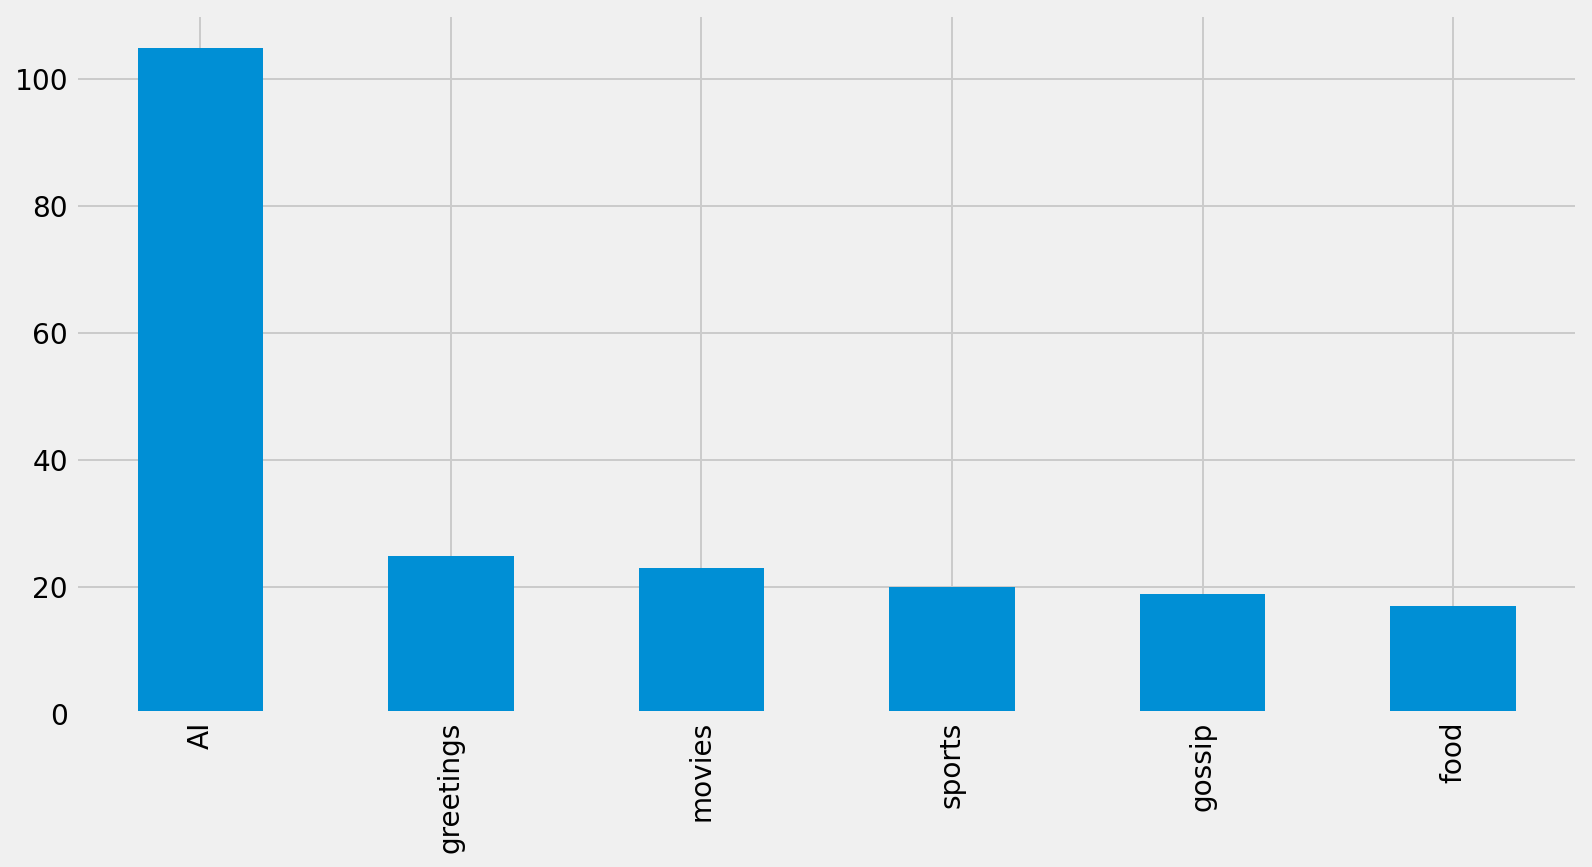

In [51]:
# grouping the data based on category and plotting the count of instances individually
data["category"].value_counts().plot.bar()

# Model Building

*   Transform a count matrix to a normalized tf-idf representation (tf-idf transformer)
*   Splitting labels and feature columns


In [52]:
# transform a count matrix to a normalized tf-idf representation (tf-idf transformer)
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
# splitting the dataset into features and labels and converting them into array
features = tfidf.fit_transform(data.question).toarray()
labels = data.category_id

Train Test Split

In [ ]:
# splitting the dataset into train and test
# Train portion 67% and test portion 33%
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, data.index, test_size=0.33, random_state=0)

Training model with Logistic Regression

In [ ]:
# declaring LOGISTIC REGRESSION with random state 0
model = LogisticRegression(random_state=0)
# Fitting the train value into the model
model.fit(X_train, y_train)
# prediction of our model for further analysis
y_pred = model.predict(X_test)

Confusion Matrix

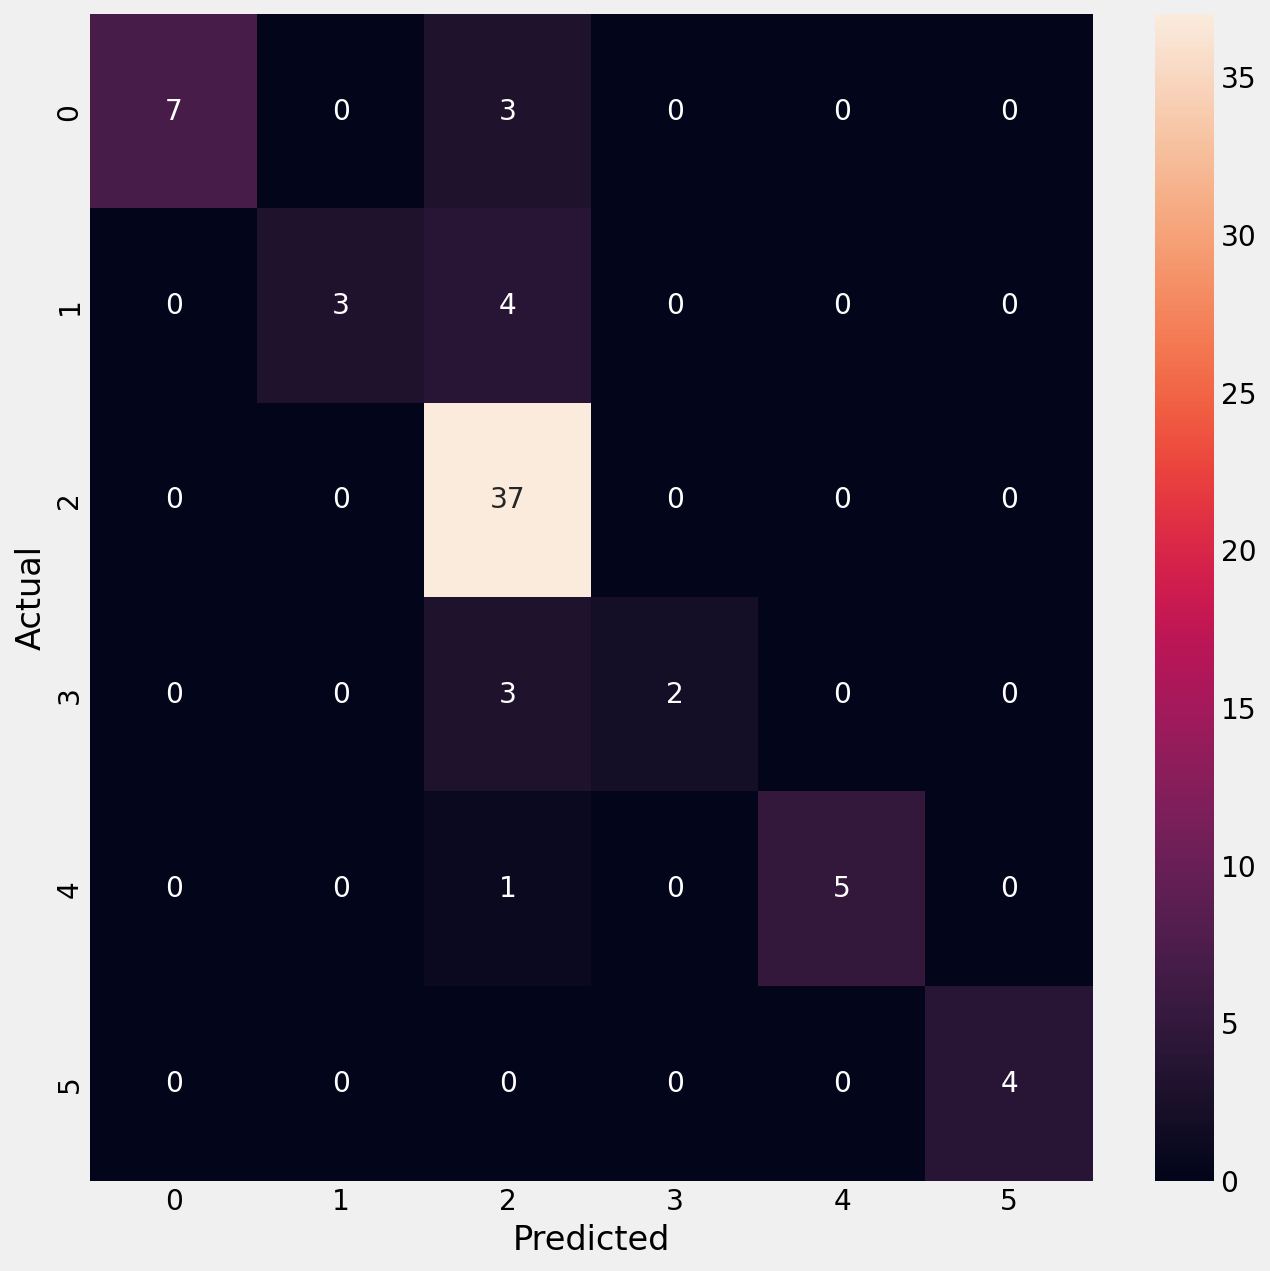

In [57]:
# feeding true value and predicted value into the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
# Seaborn library to plot confusion matrix
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Accuracy, Precision, Recall, F1-Score

In [58]:
# printing the classification report
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       1.00      0.43      0.60         7
           2       0.77      1.00      0.87        37
           3       1.00      0.40      0.57         5
           4       1.00      0.83      0.91         6
           5       1.00      1.00      1.00         4

    accuracy                           0.84        69
   macro avg       0.96      0.73      0.80        69
weighted avg       0.88      0.84      0.83        69



# Chatbot

In [59]:
%%capture
# integrating our model to chatbot
model = ChatBot('Logistic Regression')
trainer = ChatterBotCorpusTrainer(model)
trainer.train("/content/data")

Chatbot interface - There's a web app too

In [65]:
# interface of the chatbot; type quit to STOP
while(1):
  inputBot = input("Type: ")

  if(inputBot == 'quit'):
    print('Response: Bye!')
    break
  else:
    outBot = chatbot.get_response(inputBot)
    print('Response: ' + str(outBot))

Type: Hello
Response: Hi
Type: How do you do
Response: I'm doing well.
Type: Do you drink
Response: My brain does not require any beverages.
Type: What language are you written in
Response: Python.
Type: What is teknolust
Response: is a science fiction film about a female pleasure bot named agent ruby.
Type: Who is spider man
Response: peter parker.
Type: It is a pleasure to meet you
Type: quit
Response: Bye!
